Taylor Gabatino

March 15, 2022

ICS 434 Data Science Fundamentals

Hypothesis Testing Experimental Learning

In [2]:
# Import Statements
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
from scipy import stats

### Example 

* Suppose we have two samples that represent Biki ride durations for two distinct neighborhoods `a` and `b`

* Instead of working with actual data, sample the data for the two neighborhoods from a gaussian with a mean ($\mu=20$) the a standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    * In our scenario, this amounts to measuring the duration of 30 bike rides

In [43]:
# Creation of two samples that represent Biki ride durations
dataset_a = np.random.normal(20,4,15)
dataset_b = np.random.normal(20,4,15)

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [35]:
# Computation of the means of dataset a and b
mean_a = np.mean(dataset_a)
mean_b = np.mean(dataset_b)
# Print the means of the dataset
print('The mean of dataset "a" is: ', mean_a)
print('The mean of dataset "b" is: ', mean_b)
print('The observed difference between "a" and "b" is:', mean_a-mean_b)

The mean of dataset "a" is:  20.236037426387522
The mean of dataset "b" is:  20.067917403163566
The observed difference between "a" and "b" is: 0.16812002322395614


Based on the observation of the means, I believe that there is no observed statistically significant difference between samples 'a' and 'b'. The values of the means are too close for there to be an observable difference, with a difference of approximately 0.16.

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

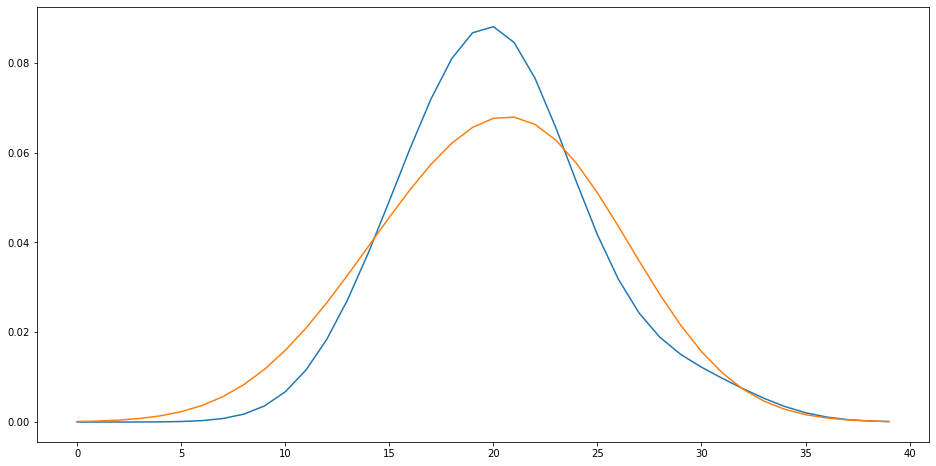

In [42]:
'''
The following are the KDE's representing the datasets a and b. 
The figure below is the approximation of the image above
'''

x_values = np.arange(0,40,1)

kde1 = sp.stats.gaussian_kde(dataset_a, bw_method = 0.8)
kde2 = sp.stats.gaussian_kde(dataset_b, bw_method = 1.2)

plt.figure(figsize=(16,8))
plt.xlabel('Mean')
plt.ylabel('Density')
plt.plot(x_values, kde1.evaluate(x_values))
plt.plot(x_values, kde2.evaluate(x_values))


### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

Visually, dataset a differs slightly from dataset b. This can be observed as dataset a and b have similar means, as observed through the Gaussian distribution; however, closer observation of the standard deviations determine that dataset 'b' has a larger standard deviation than 'a', meaning the range of values that 'b' could NOT possibly be are larger.

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [46]:
data = np.concatenate([dataset_a,dataset_b])
pval = []

for _ in range (1000):
    np.random.shuffle(data)
    subset_a=data[:20]
    subset_b=data[20:]
    pval.append(np.mean(subset_a)-np.mean(subset_b))

p_value = sum(pval >= np.mean(dataset_a) - np.mean(dataset_b)) / 1000

print('The P-Value of the subset of data is: ', p_value)

The P-Value of the subset of data is:  0.93


### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

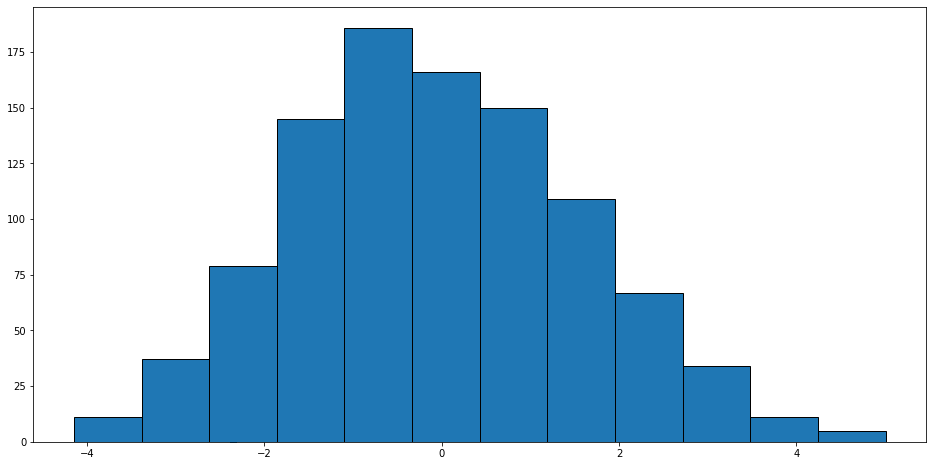

In [47]:
'''
The figure below is the histogram of the means obtained during resampling and observed value.
'''
plt.figure(figsize=(16,8))
plt.hist(pval, edgecolor='black', bins=12)
plt.scatter(np.mean(dataset_a)- np.mean(dataset_b), 0)
